# Analysis, Visualization and Extensive Imputation of CO2 Emissions in Food Products

## 1. Introduction

**Objectives:** The objectives of this analysis are two-fold. First, to provide an analysis of the dataset within the archetype of a scientist and researcher attempting to compress information to be used for colleagues at various positions (e.g. engineers might require more operational insight, while management will require an overview). Second, to provide a walkthrough for all fellow coders and statisticians through descriptive actions.

**Descriptive actions:** I tried to describe the reasoning behind (almost) every line of code during the examination of this dataset - especially during the feature engineering, imputation, and analysis sections. This extra work serves two functions: first to help new learners understand all featured techniques and second, to allow more experienced statisticians and coders to correct my code or way of approaching the problem - even through there are some serious limitations about this dataset.

**Limitations:** It is also important to note that since we have <50 entries there is a very high probability that many models are inadvisable to use since we would not be able to obtain a sufficient alpha level. This includes many estimator models we utilize with sklearn but also with any correlation, regression and other analysis performed. More on this later on. Finally, I tried to adhere to the Zen of Python rules, however, some have been deliberately broken in order to showcase certain analyses.

## 2. Importing Libraries and Datasets

In [5]:
import math as math
import pandas as pd
import numpy as np
import seaborn as sns
import squarify as sqf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [2]:
df_food = pd.read_csv("../input/environment-impact-of-food-production/Food_Production.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
import warnings
warnings.filterwarnings("ignore")

## 3. Overview

First, let us start in the standard way and have a quick overview of our dataset prior to feature engineering and subsequent analysis.

In [3]:
df_food.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [4]:
df_food.head(3)

# A few first-sight findings: 
# We notice long-winded colunm names, naming inconsistencies, overwhelming usage of numeric columns, descriptive statistics will most likely revolve around the food products and certain key features/columns

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_food.describe(include='all')

# Negative values can be spotted under the [Land Use Change] column (notice the minumum values)
# Incosistencies detected in the 75% percentile range for certain columns (e.g. [Animal Feed] and [Transport])
# Radical differences in min/max in latter columns (e.g. [Scarcity Water])

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,27.000000,30.000000,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
unique,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Wheat & Rye (Bread),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,NaN,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,52.033823,539.130695,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,NaN,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,NaN,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,17.855335,106.927557,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,NaN,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,37.333333,338.059413,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,NaN,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,55.297183,694.805356,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593


In [6]:
df_food.info()

# Mostly numeric variables. Several missing values which already point towards a Missing Not At Random (MNAR) archetype.
# We shall deal with them in the Feature Engineering Section.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

## 4. Feature Engineering

We have a few issues to address before we can proceed, we need to:
- First, rename our columns
- Second, scout for any negative values
- Third, deal with any missing values
- Fourth, assuming that we have taken the task to assist science, engineering, or business operations, we might need to make certain data transformations in order to assist our colleagues who will surely have varying needs (e.g. generalized vs specific, product-focused vs process-focused, etc.).

### 4.1 Renaming Columns

In [8]:
# The column names in the dataset are quite inconsistent (some use underscores, others spaces, there are letters missing, etc.) and some columns have long names that need to be revisited.

# Creating short dataframes containing a keyword from the various columns
df_eutro = df_food.loc[:, ["Eutro" in i for i in df_food.columns]]
df_freshwater = df_food.loc[:, ["Freshwater" in i for i in df_food.columns]]
df_gas = df_food.loc[:, ["gas" in i for i in df_food.columns]]
df_land = df_food.loc[:, ["Land" in i for i in df_food.columns]]
df_scarc_water = df_food.loc[:, ["Scarcity" in i for i in df_food.columns]]

# Correcting the inconsistent naming patterns and renaming the long-winded columns
df_food.rename(columns = {
    'Food product' : 'Food_Product',
    'Packging' : 'Packaging',
    'Total_emissions' : 'Total_Emissions',
    'Animal Feed' : 'Animal_Feed',
    df_eutro.columns[0] : "Eutro_Em_1000kcal",
    df_eutro.columns[1] : "Eutro_Em_1kg",
    df_eutro.columns[2] : "Eutro_Em_100gProtein",
    df_freshwater.columns[0] : "Freshwater_1000kcal",
    df_freshwater.columns[1] : "Freshwater_100gProtein",
    df_freshwater.columns[2] : "Freshwater_1kg",
    df_gas.columns[0] : "GGas_Em_1000kcal",
    df_gas.columns[1] : "GGas_Em_100gProtein",
    df_land.columns[0] : "Land_Use_Change",
    df_land.columns[1] : "Land_Use_1000kcal",
    df_land.columns[2] : "Land_Use_1kg",
    df_land.columns[3] : "Land_Use_100gProtein",
    df_scarc_water.columns[0] : "ScarcWater_1kg",
    df_scarc_water.columns[1] : "ScarcWater_100gProtein",
    df_scarc_water.columns[2] : "ScarcWater_1000kcal"
}, inplace=True)

print("New column names: \n")
for col in df_food:
    print(col)

New column names: 

Food_Product
Land_Use_Change
Animal_Feed
Farm
Processing
Transport
Packaging
Retail
Total_Emissions
Eutro_Em_1000kcal
Eutro_Em_1kg
Eutro_Em_100gProtein
Freshwater_1000kcal
Freshwater_100gProtein
Freshwater_1kg
GGas_Em_1000kcal
GGas_Em_100gProtein
Land_Use_1000kcal
Land_Use_1kg
Land_Use_100gProtein
ScarcWater_1kg
ScarcWater_100gProtein
ScarcWater_1000kcal


Low number of unique values?

On a secondary nature, it would be a fair assumption to expect different food products to have different CO2 emission measurements for certain features/columns like [Retail], [Transport], [Packaging], and [Animal Feed]. However, they have a surprising low amount of unique values, as can be seen in the following cell.

In [8]:
print("Unique values - standardized agriculture operations: " + "\n\n"
    + str(df_food[["Retail", "Transport", "Packaging", "Animal_Feed"]].nunique()) + "\n\n"
    + "Top 10 Retail Values for Food Products" + "\n"
    + str(df_food[['Food_Product', 'Retail', 'Transport']].sort_values(by='Retail', ascending=False).head(10)))

Unique values - standardized agriculture operations: 

Retail          4
Transport       8
Packaging      10
Animal_Feed    10
dtype: int64

Top 10 Retail Values for Food Products
         Food_Product  Retail  Transport
13            Soymilk     0.3        0.1
2       Barley (Beer)     0.3        0.0
39             Cheese     0.3        0.1
38               Milk     0.3        0.1
14               Tofu     0.3        0.2
42   Shrimps (farmed)     0.2        0.2
37       Poultry Meat     0.2        0.3
36           Pig Meat     0.2        0.3
35      Lamb & Mutton     0.2        0.5
34  Beef (dairy herd)     0.2        0.4


Out of 42 entries in our dataset, [Retail] has only four unique values,[Transport] has eight, and [Packaging] and [Animal_Feed] have ten.

This can be justified by considering the following:
1. Primary hypothesis: these features deal with industrialized agricultural techniques, therefore, it is expected that many package-transport-retail processes are standardized.
2. Secondary and less likely hypothesis: these entries may have been assigned values as part of a clustering method rather than on an individual basis.
3. Note that ["Animal_Feed"] concerns only food products with animal food products, therefore it applies only to those 10 entries.

### 4.2 Addressing Negative Values

In [9]:
# First, let us scout for negative values in our dataset and, if detected, determine how to proceed with the analysis.

df_numeric = df_food.select_dtypes('number')
neg_values = (df_numeric<0).sum().sum()

print(f"Number of negative values in the dataset: {neg_values}")

Number of negative values in the dataset: 4


In [10]:
# It would appear that only only column holds negative values: Land-Use Change

(df_numeric<0).sum().sort_values(ascending=False).head(3)

Land_Use_Change           4
Animal_Feed               0
ScarcWater_100gProtein    0
dtype: int64

In [11]:
# There are four entries of food products in Land-Use Change that hold negative values.

df_food[df_food['Land_Use_Change']<0][['Food_Product', 'Land_Use_Change']]

,Food_Product,Land_Use_Change
11,Nuts,-2.1
19,Olive Oil,-0.4
25,Citrus Fruit,-0.1
29,Wine,-0.1


As an example of a more deep-dive approach to understanding our dataset let's focus on the most prevalent negative value: why does the "Nuts" entry have a -2.1 value?

As is noted in the website OurWorldInData (https://ourworldindata.org/faqs-environmental-impacts-food):
"In the recent past, many nut plantations have been replaced grasslands or abandoned pastures. Since the trees of nut crops sequester carbon dioxide, when they replace some grasslands this can actually result in an emission saving due to positive land use change. This effect, however, will eventually diminish as nut plantations are grown on land that was not previously grasslands."

Negative values will hinder our ability to properly visualize the data.

Therefore we shall proceed with the following choices:
1. Made a note of our discovery and provided scientific evidence regarding its presence.
2. Replace all negative values with zero so we can proceed with the analysis.

In [12]:
# We can iterate through the columns in our dataframe that hold numeric values in order to detect and replace all negative values with zero

for col in df_food.iloc[:, df_food.columns.get_loc('Land_Use_Change'):df_food.columns.get_loc('ScarcWater_1000kcal')]:
    for ind, entry in enumerate(df_food[col]):
        if entry < 0:
            df_food.at[ind, col] = 0
print(f"Number of negative values in the dataset: {((df_food.iloc[:,1:-1])<0).sum().sum()}")

Number of negative values in the dataset: 0


In [9]:
# Creating a food category column which we will retain for all following sections of this analysis.

df_food["Category"] = df_food["Food_Product"] # creating a new column with the exact list of [Food_Products]

# Setting various lists for different types of [Food_Products]
Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ["Soymilk",'Milk', 'Cheese']
Animal_Prod = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]

# Replacing all [Food_Products] in the newly developed column with their respective food [Category]
for i in df_food["Category"]:
    if i in Grains:
        df_food["Category"].replace([i], "Grains", inplace=True)
    elif i in Nuts:
        df_food["Category"].replace([i], "Nuts", inplace=True)
    elif i in Vegetables:
        df_food["Category"].replace([i], "Vegetables", inplace=True)
    elif i in Fruits:
        df_food["Category"].replace([i], "Fruits", inplace=True)
    elif i in Sugars:
        df_food["Category"].replace([i], "Sugar", inplace=True)
    elif i in Oils:
        df_food["Category"].replace([i], "Oils", inplace=True)
    elif i in Dairy:
        df_food["Category"].replace([i], "Dairy", inplace=True)
    elif i in Animal_Prod:
        df_food["Category"].replace([i], "Animal_Prod", inplace=True)
    elif i in Other:
        df_food["Category"].replace([i], "Other", inplace=True)

### 4.3.1 Overview of Missing Values

In the previous overview section we noticed that there are quite a few missing values.

To have a better overview we can create an informative table that will show us the following stats:
1. which columns have missing values
2. their data types
3. the prevalence of missing values based on columns
4. the percentage of missing values based on total length of observations


In [14]:
n_NAvalues = df_food.isna().sum()
perc_NAvalues = round(df_food.isna().sum()/len(df_food)*100,ndigits=1)

table_NA_info = pd.DataFrame({
    "Data Types": df_food.dtypes,
    "Unique Values" : df_food.nunique(),
    "Total NA Values": n_NAvalues,
    "%Perc NA Values": perc_NAvalues})

table_NA_info.sort_values(by = "%Perc NA Values", ascending = False)

,Data Types,Unique Values,Total NA Values,%Perc NA Values
ScarcWater_100gProtein,float64,26,17,39.5
Freshwater_100gProtein,float64,26,17,39.5
Land_Use_100gProtein,float64,27,16,37.2
GGas_Em_100gProtein,float64,27,16,37.2
Eutro_Em_100gProtein,float64,27,16,37.2
Freshwater_1000kcal,float64,30,13,30.2
ScarcWater_1000kcal,float64,30,13,30.2
Land_Use_1000kcal,float64,33,10,23.3
Eutro_Em_1000kcal,float64,33,10,23.3
GGas_Em_1000kcal,float64,33,10,23.3


In [15]:
# As a top-level summary we can explicitly show a key few stats about missing values.
# Approximately 33% of all columns in our dataset have missing values.
# At the highest missing value threshold we have 7 columns with 30% and above missing values,
# 3 columns with 20% to 30% missing values, and 10 columns with 10% to 20% missing values.

upper_NA_threshold = len(table_NA_info[table_NA_info["%Perc NA Values"]>30])
middle_NA_threshold = len(table_NA_info[(table_NA_info["%Perc NA Values"]>20) & (table_NA_info["%Perc NA Values"]<30)])
low_NA_threshold = len(table_NA_info[(table_NA_info["%Perc NA Values"]>10) & (table_NA_info["%Perc NA Values"]>20)])
perc_NA = round((sum(df_food.isna().any())/len(df_food))*100,ndigits=2)

print("Percentage of columns with NA values in original dataset: " + "%" + str(perc_NA) + "\n"
      "Number of columns with 30% to 40% missing values: " + str(upper_NA_threshold) + "\n"
      "Number of columns with 20% to 30% missing values: " + str(middle_NA_threshold) + "\n"
      "Number of columns with 10% to 20% missing values: " + str(low_NA_threshold))

Percentage of columns with NA values in original dataset: %32.56
Number of columns with 30% to 40% missing values: 7
Number of columns with 20% to 30% missing values: 3
Number of columns with 10% to 20% missing values: 10


### 4.3.2 MNAR Archetype and systematic bias for missing values

How can we interpret the information we already gathered?

We notice that the majority of missing values in the table_NA_info above are primary found on all columns that deal with protein measurements (37%-40% NA values), followed by all variables dealing with kcal measurements (20% to 30% NA values), and finally by kg measurements (11.6% NA values).

As such, this points towards the "Missing Not At Random" (MNAR) archetype, meaning there is a systematic bias in the missing pattern (i.e. it is not completely random) since the missing values are found in specific columns rather than randomly in our dataset.

### 4.3.3 Imputation Methods

We need to choose an imputation method. Among others, our choices include the following methods:
1. Dropping columns with missing values
2. Imputation by average value 
3. Imputation by median
4. Imputation by K nearest neighbors (KNN)
5. Multiple imputation by chained equations (MICE)
6. Hot-deck A: custom-fitted imputation using average value
7. Hot-deck B: custom-fitted imputation using MICE

In the next section we will explode these imputation methods in different temporary datasets prior to making final choice.

Under each scenario we will choose three columns with the highest amount of missing values (as shown in the [table_NA_info] above) as examples to illustrate a few highlights of the results of each method and make a brief, top-level note of the differences of the mean values of each of these column after every imputation method.

#### 1) Dropping columns with missing values

As shown in section 4.3.1, approximately 32% of our columns have missing data. We could go with the easy route and simply drop all columns with NA values but to waste such valuable information in such a small dataset with few entries (we only have 43 entries of food products!) is not expected to be particularly helpful.

In [16]:
# Dropping NA values would be easy thing to do, however, it might not be the most scientific approach.

diff = round((len(df_food.dropna())/len(df_food))*100, ndigits=2)
             
print("Number of rows in original dataset: " + str(len(df_food)) + "\n"
      "Number of rows after dropping NA values: " + str(len(df_food.dropna())) + "\n"
      "Percentage difference: " + "%" + str(diff))

# Indeed, if we choose to drop NA values we would lose a staggesting 55.8% of the observations (rows) in our original dataset.

Number of rows in original dataset: 43
Number of rows after dropping NA values: 24
Percentage difference: %55.81



Performing a drop_na function will cause numerous problems including, among others:
1. cause a significant loss of statistical power (even in a dataset with <50 entries)
2. lower the representation of various food products across key features
3. affect the correlations between said features
4. lower the dependability of our regression analyses

#### 2) Imputation by average value (mean)

Imputation using mean or median are two univariate approaches that are particularly popular due to their ease of implementation and in our case are definetely one step above the previous method of simply dropping all columns with missing values.

In [142]:
# Mean Imputation

df_mean = df_food.copy(deep=True)

df_mean = df_mean.fillna(df_mean.mean())
df_mean_na_sum = df_mean.isna().sum().sum()

print(f"Method: Mean Imputation \n" 
      + f"Number of missing values in dataset: {df_mean_na_sum} \n\n"
      + f"Mean value in Eutro_Em_1000kcal: {round(df_mean['Eutro_Em_1000kcal'].mean(),2)} \n"
      + f"Mean value in Freshwater_100gProtein: {round(df_mean['Freshwater_100gProtein'].mean(),2)} \n"
      + f"Mean value in Eutro_Em_100gProtein: {round(df_mean['Eutro_Em_100gProtein'].mean(),2)}")

Method: Mean Imputation 
Number of missing values in dataset: 0 

Mean value in Eutro_Em_1000kcal: 27.18 
Mean value in Freshwater_100gProtein: 1437.98 
Mean value in Eutro_Em_100gProtein: 52.77


In [21]:
df_mean.describe()

,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packaging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.323256,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.316470,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,40.541356,77.723571,40.939993,447.990096,1112.513242,1217.351290,9.264288,15.285445,24.744768,73.670048,38.794807,53397.625506,69381.104324,13488.030328
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.552725,4.790000,30.195255,187.372442,814.366438,116.950000,0.903757,5.837687,1.928027,1.795000,7.163865,4787.050000,16812.488160,5922.733142
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,16.843327,16.920000,52.771953,504.188977,1437.975324,482.400000,3.243056,13.524906,4.354167,8.410000,27.025000,17982.700000,59196.438503,17380.575408
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,27.181547,46.141316,52.771953,550.140858,1437.975324,970.252632,5.633943,13.524906,12.423165,23.965000,29.105042,36607.428947,59196.438503,21650.819220
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


#### 3) Imputation by median value

In [10]:
# Median Imputation: the process is quite similar to imputation by mean

df_median = df_food.copy(deep=True)

df_median = df_median.fillna(df_median.median())
df_median_na_sum = df_median.isna().sum().sum()

print(f"Method: Median Imputation \n" 
      + f"Number of missing values in dataset: {df_median_na_sum} \n\n"
      
      + f"Median value in Eutro_Em_1000kcal: {(round(df_median['Eutro_Em_1000kcal'].median(),ndigits=1))} \n"
      + f"Mean value in Eutro_Em_1000kcal: {round(df_median['Eutro_Em_1000kcal'].mean(),2)} \n\n"
      
      + f"Median value in Freshwater_100gProtein: {round(df_median['Freshwater_100gProtein'].median(),2)} \n"
      + f"Mean value in Freshwater_100gProtein: {round(df_median['Freshwater_100gProtein'].mean(),2)} \n\n"
      
      + f"Median value in Eutro_Em_100gProtein: {round(df_median['Eutro_Em_100gProtein'].median(),2)}\n"
      + f"Mean value in Eutro_Em_100gProtein: {round(df_median['Eutro_Em_100gProtein'].mean(),2)}")

Method: Median Imputation 
Number of missing values in dataset: 0 

Median value in Eutro_Em_1000kcal: 7.0 
Mean value in Eutro_Em_1000kcal: 22.49 

Median value in Freshwater_100gProtein: 1083.33 
Mean value in Freshwater_100gProtein: 1297.77 

Median value in Eutro_Em_100gProtein: 37.33
Mean value in Eutro_Em_100gProtein: 47.03


In [23]:
df_median.describe()

,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packaging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.323256,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,22.488164,42.108605,47.027350,453.963760,1297.765629,872.662791,4.637991,10.910987,10.226207,26.659884,21.228306,34040.640698,44062.791446,15936.874431
std,3.316470,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,41.449056,78.533390,41.630484,454.593279,1126.262810,1228.780658,9.443426,15.666822,25.072109,74.027435,40.152551,53875.508826,71919.083504,13669.357784
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.552725,4.790000,30.195255,187.372442,814.366438,116.950000,0.903757,5.837687,1.928027,1.795000,7.163865,4787.050000,16812.488160,5922.733142
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,37.333333,338.059413,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,17.296663,36.165000,46.375941,550.140858,1191.055487,833.950000,4.196842,9.527778,4.460075,12.590000,17.222222,31340.350000,44916.778855,21650.819220
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


#### 4) KNN Imputation

Clustering-based imputation is a very useful tool. This is particularly true in datasets like this where the entries of certain variables are naturally grouped together which, in turn, makes predicting of missing values a lot easier.

In [24]:
df_numeric = df_food.iloc[:,1:-1] # include only numeric columns 

from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = "distance", metric = "nan_euclidean")
# the reason we opt for weighted distance is to alleviate at least some of the issues from outliers (e.g. from Food_Product emission values like Beef)
# also, opting for hyperparameter n = 5, hypothesizing that there will be approximately five different overaching food categories for all food products (see the Hot Deck custom approach section for more info)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns = df_numeric.columns)

df_knn.insert(0, "Food_Product", df_food["Food_Product"]) # re-attaching the excluded [Food_Product] column
df_knn_na_sum = df_knn.isna().sum().sum()

print(f"Method: KNN Imputation \n" 
      + f"Number of missing values in dataset: {df_knn_na_sum} \n\n"
      + f"Mean value in Eutro_Em_1000kcal: {round(df_knn['Eutro_Em_1000kcal'].mean(),2)} \n"
      + f"Mean value in Freshwater_100gProtein: {round(df_knn['Freshwater_100gProtein'].mean(),2)} \n"
      + f"Mean value in Eutro_Em_100gProtein: {round(df_knn['Eutro_Em_100gProtein'].mean(),2)}")

Method: KNN Imputation 
Number of missing values in dataset: 0 

Mean value in Eutro_Em_1000kcal: 25.31 
Mean value in Freshwater_100gProtein: 1329.92 
Mean value in Eutro_Em_100gProtein: 48.35


Note that while the KNN imputation enjoys its fair share of popularity, this does not mean it is the optimal solution.

KNN imputation still struggles with certain issues (like outlier values which is a big problem in this dataset) and may require some fine tuning to the "k" hyperparameter. Still, it can be an invaluable ally when dealing with missing values!

#### 5) MICE Imputation

For this section we will make use of the IterativeImputer library which features multivariate imputation.
This is because it utilizes multiple features  as opposed to the univariate imputation from SimpleImputer which deals with missing values using only data from one feature.

Multiple Imputation by Chained Equations (MICE) is currently considered one of the most potent tools for dealing with missing data.

The process involves multiple iteration circles. During each iteration selected missing data can be imputed through multiple predictive models. These range from standard mean imputation to linear regression and random forests.  Note that by default MICE makes use of BayesianRidge model but there exist specific options to instruct the algorithm which predictive method to use.

Each missing value is treated as a depended variable and the remainder data is used to predict it. After each iteration circle imputed values from specific variables that resulted from that iteration's predictive model are used to impute missing data in other variables. The process is completed when all prediction modelling reaches its course by achieving an optimal result of convergence between existed data and missing data.

In [25]:
# MICE imputation

# Retrieving numeric columns
df_numeric = df_food.select_dtypes('number') # a more explicit option to select numeric columns
df_mice = df_numeric.copy(deep=True)

# Importing necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# We will choose the default model used by the MICE algorithm: the Bayesian Ridge model.
mice_imputer = IterativeImputer(
    missing_values = np.nan,
    estimator = BayesianRidge(), 
    initial_strategy = 'mean',   
    imputation_order = 'ascending',
    verbose = 1,
    max_iter = 9)

df_mice = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns = df_mice.columns)
df_mice.insert(0,"Food_Product", df_food["Food_Product"])
df_mice.insert(1,"Category", df_food["Category"])

df_mice_na_sum = df_mice.isna().sum().sum()

print(f"\nMethod: KNN Imputation \n" 
      + f"Number of missing values in dataset: {df_mice_na_sum} \n\n"
      + f"Mean value in Eutro_Em_1000kcal: {round(df_mice['Eutro_Em_1000kcal'].mean(),2)} \n"
      + f"Mean value in Freshwater_100gProtein: {round(df_mice['Freshwater_100gProtein'].mean(),2)} \n"
      + f"Mean value in Eutro_Em_100gProtein: {round(df_mice['Eutro_Em_100gProtein'].mean(),2)}")

[IterativeImputer] Completing matrix with shape (43, 22)
[IterativeImputer] Change: 37380.07930115055, scaled tolerance: 431.62 
[IterativeImputer] Change: 1710.7499297604745, scaled tolerance: 431.62 
[IterativeImputer] Change: 259.6298655784351, scaled tolerance: 431.62 
[IterativeImputer] Early stopping criterion reached.

Method: KNN Imputation 
Number of missing values in dataset: 0 

Mean value in Eutro_Em_1000kcal: 28.24 
Mean value in Freshwater_100gProtein: 1329.64 
Mean value in Eutro_Em_100gProtein: 51.15


#### 6) Hot-Deck A: Custom-fitted imputation by average value

No imputation walkthrough would be complete without a custom-made imputation method created specifically that our unique dataset allowing us more freedom of engineering, albeit at the cost of a standardized methodology.

For this hot-deck method we can try to blend in a few key features from our previous methods:
1. A useful perspective would be to cluster products based on their respective category where each food product would belong within a specific food category (already performed in the previous section)
2. Once all categories are set, we can utilize them to perform various imputation methods based on each product's respective category. We will use these newly created clusters to make accurate predictions about missing values by using several sub-segments of our dataset to predict similar values.
3. Finally, as an optional method we may blend in our previous imputation methodologies (e.g. like MICE) to further strengthen our algorithm.

The [Category] column was created in the previous section. We can use this new column to further strengthen our imputation methodology and avoid certain imputation pitfalls from previous methods (e.g. standard mean imputation) that might affect our predicted values.

For example, mean imputation will take the mean of all entries of [Food_Products] thus resuling in much higher or lower values for our missing values: the [Food_Product] entry entitled [Beef (beef herd)] scores the highest in almost every feature measuring CO2 emissions across the board while [Bananas] score considerably lower.

In [26]:
# Looking at an example about product differences. In the two entries "Beef" and "Bananas" we can clearly see their massive difference across all features measuring CO2 emissions

(df_food[df_food["Food_Product"].str.contains("beef") | (df_food["Food_Product"] == "Bananas")])

,Food_Product,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packaging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal,Category
26,Bananas,0.0,0.0,0.3,0.1,0.3,0.1,0.0,0.8,5.483333,3.29,36.555556,190.833333,1272.222222,114.5,1.433333,9.555556,3.216667,1.93,21.444444,661.9,7354.444444,1103.166667,Fruits
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.527470,Animal_Prod


So here's the key question: why would values originating from red meat and animal products be used to predict values of fruits or vegetables? If we are trying to predict missing values for low-CO2 emission food products from Vegetables and we bundle them with the high-CO2 emission from animal products wouldn't the newly imputed data values of vegetables be "unnaturally" higher?

Let us rectify this issue. We will create several sub-datasets, each containing similar types of food [Categories]. These category-specific sub-datasets will be used to impute values for [Food_Products] contained within them. To put it more simply with an example: missing values in [Fruits] will use data from other [Fruits] or [Vegetables] for the imputation method.

Since we already did the work of clustering each product in each [Category] let us make use of a simple mean imputation based on each slice of the newly formed datasets, and finally merge them all together again.

In [12]:
# Creating sub-datasets, creating a specialized "imputation pool" for clusters of food categories
df_veg_fruits = df_food[
    (df_food["Category"] == "Vegetables") |
    (df_food["Category"] == "Fruits")]
df_veg_fruits_mean = df_veg_fruits.fillna(df_veg_fruits.mean()) # performing a mean imputation for each missing value in our clusters

# repeate the process for all other categories
df_grains_nuts = df_food[
    (df_food["Category"] == "Nuts") |
    (df_food["Category"] == "Grains")]
df_grains_nuts_mean = df_grains_nuts.fillna(df_grains_nuts.mean())

df_anim_dairy = df_food[
    (df_food["Category"] == "Animal_Prod") |
    (df_food["Category"] == "Dairy")]
df_anim_dairy_mean = df_anim_dairy.fillna(df_anim_dairy.mean())

df_oils_sugar_other = df_food[
    (df_food["Category"] == "Oils") |
    (df_food["Category"] == "Sugar") |
    (df_food["Category"] == "Other")]
df_oils_sugar_other_mean = df_oils_sugar_other.fillna(df_oils_sugar_other.mean())

# concatenating all newly created datasets holding specifically imputed values
df_sum = pd.concat([df_veg_fruits_mean,df_grains_nuts_mean,df_anim_dairy_mean,df_oils_sugar_other_mean]).round(2)
df_sum = df_sum.sort_index()

print(f"Method: Hot-Deck, Custom-Fitted Imputation \n" 
      + f"Number of missing values in dataset: {df_sum.isna().sum().sum()} \n\n"
      + f"Mean value in Eutro_Em_1000kcal: {round(df_sum['Eutro_Em_1000kcal'].mean(),2)} \n"
      + f"Mean value in Freshwater_100gProtein: {round(df_sum['Freshwater_100gProtein'].mean(),2)} \n"
      + f"Mean value in Eutro_Em_100gProtein: {round(df_sum['Eutro_Em_100gProtein'].mean(),2)}")

Method: Hot-Deck, Custom-Fitted Imputation 
Number of missing values in dataset: 0 

Mean value in Eutro_Em_1000kcal: 26.41 
Mean value in Freshwater_100gProtein: 1278.29 
Mean value in Eutro_Em_100gProtein: 72.0


#### 7) Hot-Deck B: custom-fitted imputation by MICE

In [28]:
# Alternatively we can go one step further, utilizing both dataset-specific knowledge and methodology by adding MICE imputation method to our product segmentation

# Sklearn Imputer Libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Creating vegetables and fruits sub-dataset
df_veg_fruits = df_food[
    (df_food["Category"] == "Vegetables") |
    (df_food["Category"] == "Fruits")]

# Retrieving the index from original sub-dataset (since the Imputer resets the index)
df_veg_fruits_index = df_veg_fruits.index

# Retrieving only numeric columns
df_veg_fruits_num = df_veg_fruits.select_dtypes('number')

# Imputer transformation
mice_imputer = IterativeImputer(
    missing_values = np.nan,
    estimator = BayesianRidge(),
    verbose = 0)
df_veg_fruits_num_mice = pd.DataFrame(mice_imputer.fit_transform(df_veg_fruits_num), columns = df_veg_fruits_num.columns)

# Re-attaching index and numeric columns (as the first 2 columns)
df_veg_fruits_num_mice.set_index(df_veg_fruits_index, inplace = True)
df_veg_fruits_num_mice.insert(0, "Food_Product", df_veg_fruits["Food_Product"])
df_veg_fruits_num_mice.insert(1, "Category", df_veg_fruits["Category"])

print("Number of missing values in df_veg_fruits: " + str(df_veg_fruits_num_mice.isna().sum().sum()))

Number of missing values in df_veg_fruits: 0


The process will repeat for all other sub-datasets which will not be explored since the process is similar to the one in HoT-Deck A approach, albeit with a higher level of complexity. This last approach is the most complicated one and does seem like overkill. Since time and computational requirements are ever-present factors we should opt for one of the previous methods. For this analysis we will make use of the MICE approach, however, the custom-fitted and KNN methods would also be acceptable.

Our imputation section is complete.

We have utilized seven different imputation methods, covering standard easy-to-implement models but also more advanced methodologies.

## 5. Visualization and Analysis

### 5.1 Setting up

As noted in the previous section, we will opt for the MICE imputation using Bayesian Ridge to deal with missing values which is the most elegant and potent option from aforementioned imputation methods.

In [29]:
# Choosing the MICE imputation as our default DataFrame

df = df_mice

print(df.columns)

Index(['Food_Product', 'Category', 'Land_Use_Change', 'Animal_Feed', 'Farm',
       'Processing', 'Transport', 'Packaging', 'Retail', 'Total_Emissions',
       'Eutro_Em_1000kcal', 'Eutro_Em_1kg', 'Eutro_Em_100gProtein',
       'Freshwater_1000kcal', 'Freshwater_100gProtein', 'Freshwater_1kg',
       'GGas_Em_1000kcal', 'GGas_Em_100gProtein', 'Land_Use_1000kcal',
       'Land_Use_1kg', 'Land_Use_100gProtein', 'ScarcWater_1kg',
       'ScarcWater_100gProtein', 'ScarcWater_1000kcal'],
      dtype='object')


In [30]:
df.describe()

,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packaging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.323256,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,28.239093,45.463922,51.152778,461.883414,1329.644686,932.252041,6.035755,14.880588,11.460885,28.889196,27.663381,36597.816677,52334.685418,16222.787006
std,3.316470,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,40.640683,77.953793,41.090052,455.878115,1126.399793,1217.355867,9.311388,15.480209,24.845678,73.705138,38.869389,53397.652342,70272.967628,13658.433850
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.552725,4.790000,30.195255,180.289109,781.193204,116.950000,0.903757,5.837687,1.928027,1.795000,7.163865,4787.050000,16812.488160,5922.733142
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,16.843327,16.920000,47.206428,342.906895,1212.970472,482.400000,3.243056,14.427230,4.354167,8.410000,22.980171,17982.700000,45619.024077,12487.986110
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,32.715507,42.980000,52.349303,550.140858,1329.754330,977.966837,7.648929,18.643346,9.875350,22.034625,26.676003,36472.023994,52341.104125,21650.819220
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


**Operational Features:** There are some additional inconsistences in our dataset. The column [Total_Emissions] does not equate with the respective measurements in what we will call the "Operational Features": Land_Use_Change, Farm, Transport, Retail, Processing, Packaging and Animal Feed. After all, shouldn't a column entitled "Total Emissions" cover a grand sum of all emissions?

After looking at the numeric values of each column it would appear that Retail emissions might actually be excluded from the [Total_Emissions] column. There is still a 0.3 value difference but at the very least we have noticed and partially solved another issue.

In [36]:
df_operations = df[['Land_Use_Change', 'Animal_Feed','Farm','Processing','Transport','Packaging','Retail']]

print(f"Sum of [Total_Emissions]: {df['Total_Emissions'].sum().sum()}\n" +
      f"Sum of Operational Features: {df_operations.sum().sum().round()}\n" +
      f"Sum without Retail: {df.iloc[:,2:8].sum().sum().round()}")

Sum of [Total_Emissions]: 256.8
Sum of Operational Features: 260.0
Sum without Retail: 257.0


In [41]:
# For starters, let's have a top-level picture:

df_categ_group = df.groupby(["Category"]).sum().sort_values(by='Total_Emissions', ascending = False)
df_categ_group

,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packaging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
Category,,,,,,,,,,,,,,,,,,,,,,
Animal_Prod,23.1,17.0,90.3,4.2,2.2,1.9,1.2,139.9,504.968616,1218.992900,636.134226,6131.859418,7964.102848,13641.133673,88.417310,122.169646,288.957256,821.210512,420.416509,473854.429053,285351.620950,188981.716031
Other,19.0,0.0,15.2,1.7,0.5,2.9,0.4,39.6,279.503717,235.006054,415.712276,954.051910,3656.520833,1570.625980,74.970105,164.069713,67.798333,116.385923,217.465160,40851.789455,104316.168807,28681.684581
Oils,6.5,0.0,12.3,2.7,1.4,4.3,0.0,26.8,35.344830,129.470000,225.273232,773.252519,5154.334841,3808.400000,9.958220,89.646826,13.639455,67.540000,122.948370,239367.700000,162878.117175,38610.762396
Dairy,5.2,2.5,14.7,1.0,0.3,0.4,0.9,25.0,75.606678,110.080000,129.027917,2826.763919,5655.193793,6261.200000,20.084064,40.059640,42.989635,97.400000,90.369021,201592.500000,187658.380344,90997.053115
Grains,0.4,0.0,6.5,0.5,0.4,0.9,0.5,9.2,119.101414,141.839681,211.210690,2175.539836,7525.781690,5505.378116,21.174906,52.004561,33.492765,78.868997,95.468668,177708.498610,241207.435909,69220.855787
Vegetables,1.0,0.0,3.8,0.1,1.1,0.5,0.0,6.5,128.608198,48.410000,247.078358,3867.256760,8006.711307,1525.800000,27.996506,69.849477,24.420132,28.170000,77.675278,73743.200000,273252.648706,133411.335868
Sugar,1.2,0.0,1.0,0.2,1.4,0.2,0.0,4.0,6.361823,22.330000,82.087525,238.689459,1882.104101,837.800000,1.427350,35.483744,1.102564,3.870000,49.730263,25931.900000,55652.947654,7388.005698
Fruits,0.1,0.0,1.9,0.1,0.9,0.3,0.0,3.2,59.233950,15.530000,235.917269,1902.048324,14091.032695,950.400000,14.882182,65.084603,16.739894,6.720000,104.036041,48968.400000,775691.562308,92253.162150
Nuts,0.4,0.0,3.5,0.4,0.2,0.2,0.0,2.6,5.551752,33.290000,17.127953,991.524671,3238.939402,5986.100000,0.626815,1.497085,3.678007,22.070000,11.416069,291687.700000,164382.591120,48035.265620


In [93]:
# Note that we can also utilize the pivot_table command for a similar result
cols_order = list(df.columns.values)
df_piv = df.round(2).pivot_table(cols,index='Category', aggfunc="sum")
df_piv = df_piv.reindex(cols_order,axis=1) # re-indexing the columns in the same order as our dataset
df_piv.drop(df_piv.iloc[:,0:2],axis=1) # deleting the NaN columns

,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packaging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
Category,,,,,,,,,,,,,,,,,,,,,,
Animal_Prod,23.1,17.0,90.3,4.2,2.2,1.9,1.2,139.9,504.97,1218.99,636.14,6131.87,7964.11,13641.13,88.42,122.18,288.96,821.21,420.42,473854.43,285351.62,188981.72
Dairy,5.2,2.5,14.7,1.0,0.3,0.4,0.9,25.0,75.61,110.08,129.02,2826.76,5655.20,6261.20,20.08,40.06,42.99,97.40,90.37,201592.50,187658.37,90997.06
Fruits,0.1,0.0,1.9,0.1,0.9,0.3,0.0,3.2,59.23,15.53,235.92,1902.05,14091.02,950.40,14.88,65.09,16.75,6.72,104.03,48968.40,775691.56,92253.17
Grains,0.4,0.0,6.5,0.5,0.4,0.9,0.5,9.2,119.11,141.84,211.22,2175.53,7525.79,5505.37,21.18,52.01,33.49,78.87,95.47,177708.50,241207.42,69220.84
Nuts,0.4,0.0,3.5,0.4,0.2,0.2,0.0,2.6,5.55,33.29,17.13,991.52,3238.93,5986.10,0.63,1.49,3.68,22.07,11.42,291687.70,164382.59,48035.27
Oils,6.5,0.0,12.3,2.7,1.4,4.3,0.0,26.8,35.34,129.47,225.27,773.26,5154.34,3808.40,9.96,89.65,13.64,67.54,122.95,239367.70,162878.12,38610.77
Other,19.0,0.0,15.2,1.7,0.5,2.9,0.4,39.6,279.50,235.01,415.71,954.05,3656.53,1570.63,74.97,164.06,67.81,116.39,217.46,40851.79,104316.17,28681.70
Sugar,1.2,0.0,1.0,0.2,1.4,0.2,0.0,4.0,6.36,22.33,82.09,238.69,1882.10,837.80,1.43,35.49,1.10,3.87,49.73,25931.90,55652.94,7388.00
Vegetables,1.0,0.0,3.8,0.1,1.1,0.5,0.0,6.5,128.61,48.41,247.08,3867.27,8006.71,1525.80,27.99,69.87,24.43,28.17,77.68,73743.20,273252.65,133411.32


As expected, we can see that Animal Products are at the top of list for [Total_Emissions]

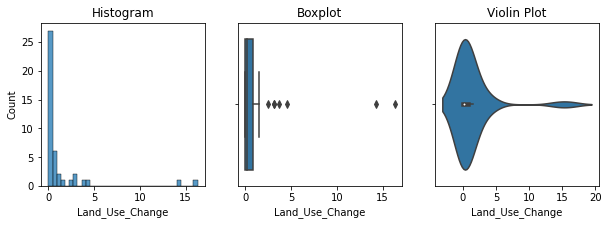

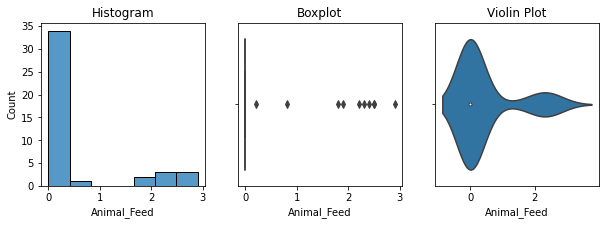

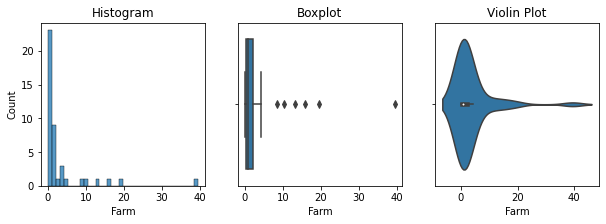

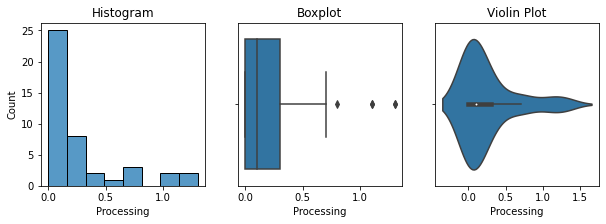

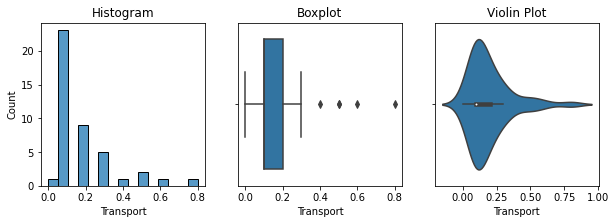

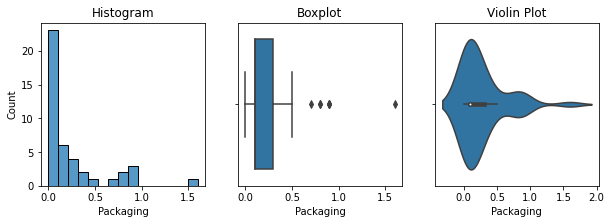

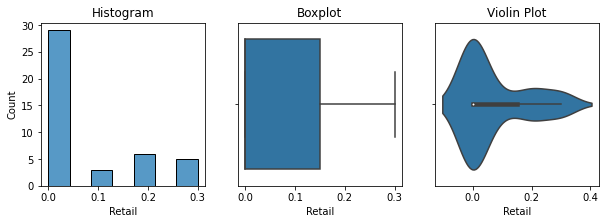

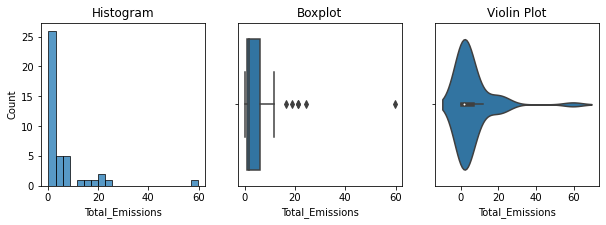

In [94]:
# A quick overview of the primary "operational" features - we shall look into into those in greater detail.

df_operational = df_food.iloc[:,1:9]
df_oper_col = df_operational.select_dtypes('number').columns

for col in df_oper_col:
    fig, ax = plt.subplots(1, 3, figsize=(10,3))
    sns.histplot(data=df_operational, x=col, ax=ax[0]).set(title="Histogram")
    sns.boxplot(data=df_operational, x=col, ax=ax[1]).set(title="Boxplot")
    sns.violinplot(data=df_operational, x=col, ax=ax[2]).set(title="Violin Plot")

We definetely have massive skewness issues and none even remotely resembles a normal distribution.

Let's do a useful overview visualization showing the [Total_Emissions] by each [Food_Product] filtered by the food [Category].

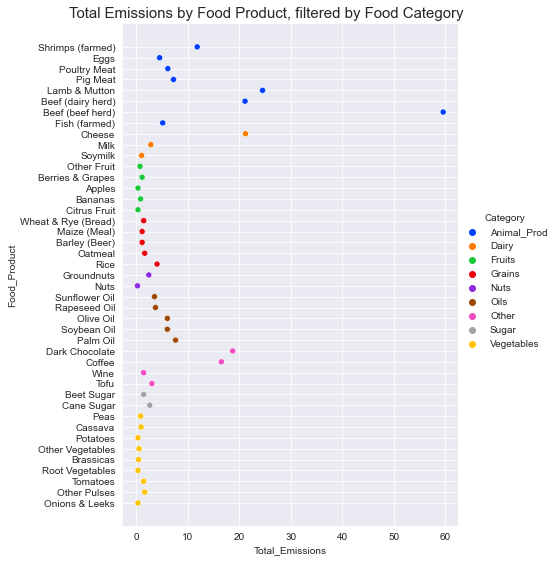

In [29]:
sns.set_style("darkgrid")
rel_plot = sns.relplot(data=df_food.sort_values(by='Category'), x='Total_Emissions', y='Food_Product',
            hue='Category', palette="bright",
           height=7, aspect=1)
rel_plot.fig.set_size_inches(8,8)
rel_plot.fig.suptitle("Total Emissions by Food Product, filtered by Food Category",
                      fontsize = 15)
rel_plot.fig.subplots_adjust(top=0.95)

It would appear that our clustering helped us get some much-needed insight. [Animal_Products] are (understandably) more erratic, while [Fruits], [Vegetables] and indeed most other food [Categories] are relatively stable as far as variability is concerned. The aptly named [Other] category that includes Coffee, Wine, Tofu and Dark Chocolate also holds a higher level of variability due to the fact that most of them are processed rather than raw products and, therefore, are expected to have greater fluctuations in measurements (in addition to being disimilar products). Note that the dataset does not mention Coffee Beans (which are actually derived from the pits of a fruit in its natural form) but rather Coffee which in most cases refers to the processed product.

### 5.2 Emissions by Product Category

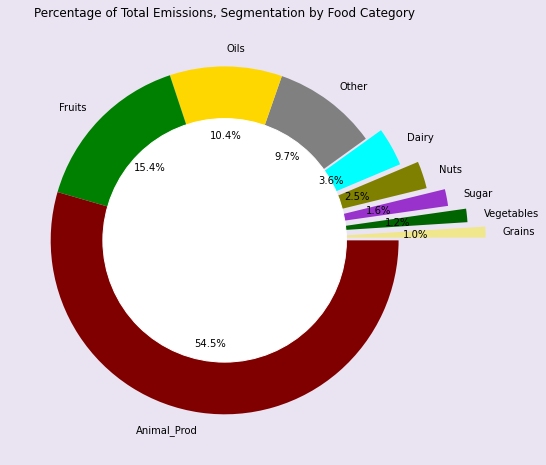

In [104]:
pie_data = df.groupby(['Category'])["Total_Emissions"].sum().sort_values()
labels = list(df["Category"].unique())
explode_vals= [0.5,0.4,0.3,0.2,0.1,0,0,0,0]
color_vals = ["khaki", "darkgreen", "darkorchid", "olive", "aqua", "grey", "gold", "green", "maroon"]

fig= plt.figure(figsize=(13,8), facecolor = '#eae4f2')
plt.pie(pie_data, labels=labels, autopct='%.1f%%', explode = explode_vals, colors = color_vals)

donut = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(donut)

plt.title('Percentage of Total Emissions, Segmentation by Food Category')
plt.show()

Animal Products appear to produce more [Total_Emissions] than the next three key sources (Fruits, Oil, and Other - processed products).

Next, since we have 43 different [Food Products] we should look at obtaining a top 15 list.

Grand sum of Total_Emissions: 256.8
Sum of Top 15 Food_Products: 219.9
Total Emission percentage of Top 15 Food Products: 85.6%


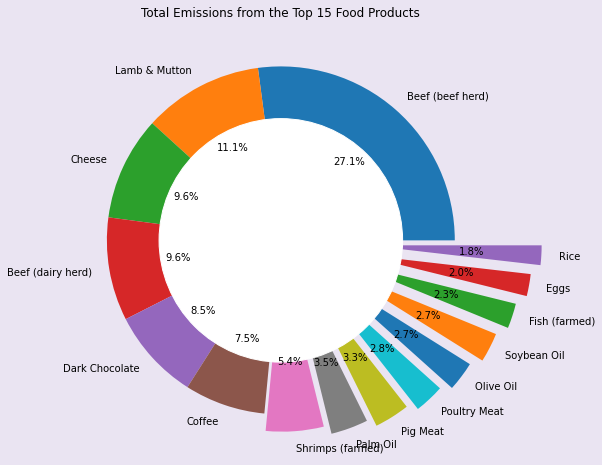

In [107]:
df_top15_emm = df.groupby(['Food_Product'])['Total_Emissions'].sum().sort_values(ascending=False).head(15)
diff_top15 = round(((df_top15_emm.sum()/df['Total_Emissions'].sum())*100), 1)

labels_15 = df_top15_emm.index
explode_vals= [0,0,0,0,0,0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]

fig = plt.figure(figsize=(15,8),facecolor = '#eae4f2')
plt.pie(df_top15_emm, labels=labels_15, autopct='%.1f%%', explode=explode_vals)

donut = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(donut)

plt.title('Total Emissions from the Top 15 Food Products')

print(f"Grand sum of Total_Emissions: {df['Total_Emissions'].sum()}\n" +
     f"Sum of Top 15 Food_Products: {df_top15_emm.sum().round(1)}\n" +
     f"Total Emission percentage of Top 15 Food Products: {diff_top15}%")

plt.show()

The Top 15 list of [Food_Products] amounts for approximately 85% of the total emissions from all 43 products present in our dataset. Since there are many proponents of the idea that pie charts should contain as little slices as possible we should zoom in closer and look at the Top 10 products just in case we can uncover a more snappy statistic for our hypothetical colleagues, customers and/or food and welfare organizations.

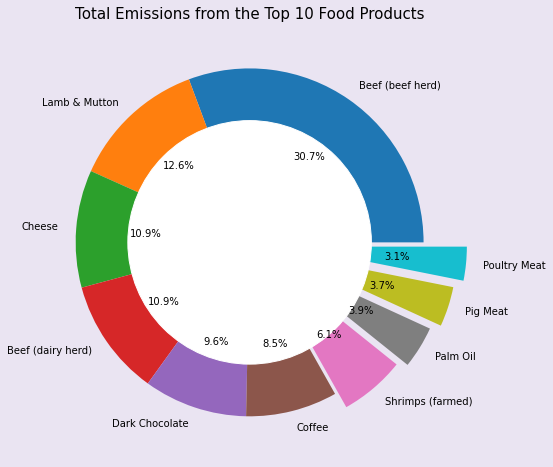

In [109]:
df_top10_emm = df.groupby(['Food_Product'])['Total_Emissions'].sum().sort_values(ascending=False).head(10)
diff_top10 = round(((df_top10_emm.sum()/df['Total_Emissions'].sum())*100),1)

labels = df_top10_emm.index
explode_vals= [0,0,0,0,0,0,0.1,0.15,0.2,0.25]

fig = plt.figure(figsize=(13,8),facecolor = '#eae4f2')
plt.pie(df_top10_emm, labels=labels, autopct='%.1f%%', explode=explode_vals)

donut = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(donut)

plt.title('Total Emissions from the Top 10 Food Products', fontsize=15)

plt.show()

In [97]:
print(f"Grand sum of Total_Emissions: {df['Total_Emissions'].sum()}\n" +
     f"Sum of Top 10 Food_Products: {df_top10_emm.sum().round(1)}\n" +
     f"Total Emission percentage of Top 10 Food Products: {diff_top10}%")

Grand sum of Total_Emissions: 256.8
Sum of Top 10 Food_Products: 194.3
Total Emission percentage of Top 10 Food Products: 75.7%


This looks better. The Top 10 list of [Food_Products] amounts for approximately 75% or 3/4ths of the total emissions from all 43 products present in our dataset. This is an interesting discovery to help us narrow down the list of products and is a lot more... "catchy" if needed to communicate insights.

### 5.3 Agriculture Operational Emissions by Value Chain

We should keep looking at the operational features for more information. Let's visualize CO2 emissions in order of value chain from start to finish: Land-Use Change, Farming, Processing, Packaging, Transportation, and finally Retail.

Let us showcase this visualization by keeping it simple and easily readable as dictated by the Zen of Python, and later on we will revisit this visualization and re-forge it using iteration.

Text(0.5, 0.98, 'Greenhouse Emissions by Food Category')

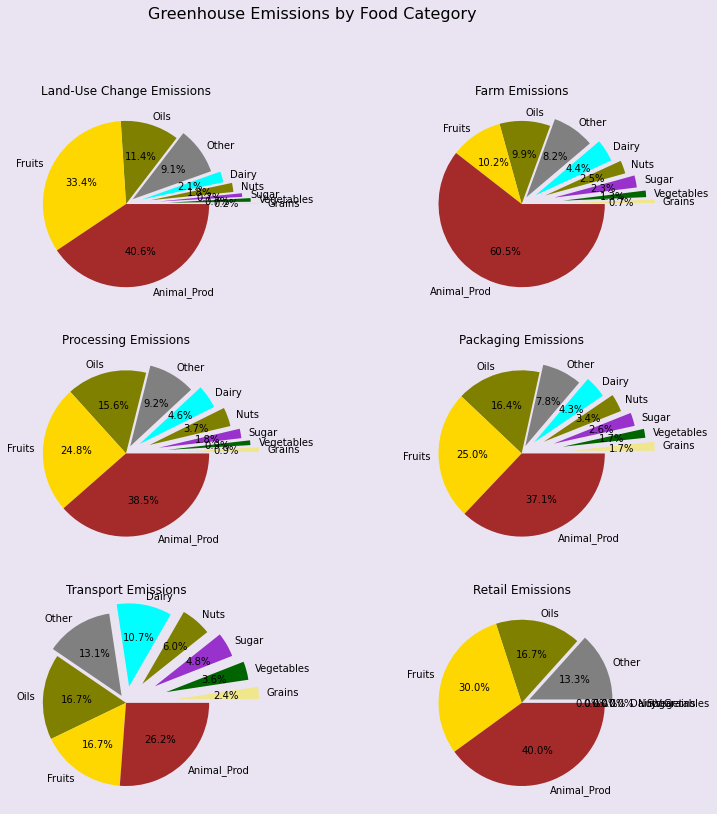

In [113]:
# Visualizing CO2 emissions in order of product value chain without a loop

data_land = df.groupby(['Category'])['Land_Use_Change'].sum().sort_values()
data_farm = df.groupby(['Category'])['Farm'].sum().sort_values()
data_proce = df.groupby(['Category'])['Processing'].sum().sort_values()
data_transp = df.groupby(['Category'])['Transport'].sum().sort_values()
data_pack = df.groupby(['Category'])['Packaging'].sum().sort_values()
data_ret = df.groupby(['Category'])['Retail'].sum().sort_values()

labels = list(df['Category'].unique())
color_vals = ["khaki", "darkgreen", "darkorchid", "olive", "aqua", "grey", "olive", "gold", "brown"]
explode_vals= [0.6,0.5,0.4,0.3,0.2,0.1,0,0,0]

fig, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(13,13),facecolor = '#eae4f2')

ax1.pie(data_land, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax1.set_title("Land-Use Change Emissions")
ax2.pie(data_farm, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax2.set_title("Farm Emissions")
ax3.pie(data_proce, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax3.set_title("Processing Emissions")
ax4.pie(data_pack, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax4.set_title("Packaging Emissions")
ax5.pie(data_transp, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax5.set_title("Transport Emissions")
ax6.pie(data_ret, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax6.set_title("Retail Emissions")

plt.suptitle('Greenhouse Emissions by Food Category',fontsize=16)

The greatest disparity appears in [Farm] emissions where [Animal Products] dominate with an astonishing 60.5% of emissions. [Packaging] and [Processing] emissions appear to be relatively more balanced, while [Transport] emissions are by far the most equal across the board (at least compared with other operations). Surprisingly, [Retail] emissions appear to concentrate around three major food categories: Oils, Fruits and Animal Products with a noticeable lack in most other categories.

### 5.4 Creating a Normalized Variable Index

In [114]:
df.columns

Index(['Food_Product', 'Category', 'Land_Use_Change', 'Animal_Feed', 'Farm',
       'Processing', 'Transport', 'Packaging', 'Retail', 'Total_Emissions',
       'Eutro_Em_1000kcal', 'Eutro_Em_1kg', 'Eutro_Em_100gProtein',
       'Freshwater_1000kcal', 'Freshwater_100gProtein', 'Freshwater_1kg',
       'GGas_Em_1000kcal', 'GGas_Em_100gProtein', 'Land_Use_1000kcal',
       'Land_Use_1kg', 'Land_Use_100gProtein', 'ScarcWater_1kg',
       'ScarcWater_100gProtein', 'ScarcWater_1000kcal'],
      dtype='object')

**Why build a scientific index?** Due to the high number of features in our dataset it would be quite burdersome to visualize each and every one for both [Food_Products] and [Categories]. However, this is not a difficulty that stems from the part of the execution but rather from the point of view of the reader (i.e. our colleagues, science teams, engineering, management, etc.). Note that we have multiple columns measuring emissions based on kilocalories, kilograms and protein per 100 grams.

AS scientists our job is condence information into a meaningful format for our colleagues.

We could easily visualize all 20+ columns but then the readers and colleagues would have to scavenge for an insightful summary among dozens of graphics. 

Instead, let us create something more... digestible (pun intended) about our food product dataset: 
1) create a new normalized feature

2) capable of summarizing information

3) constructed through multiple other features

4) scaled as a min-max index between 0 and 10 with the standard formula

(Note that "index" here refers to a scientific unit of measurement rather than a dataset index)

**Background Research:** After doing some background research I've ascertained that Eutrophication takes its name from the overabundance of nutrients in water and soil usually caused by overuse of man-made chemicals due to farming practices but also from natural processes without human intervention (the usual culprits usually being the overabundance of phosphorus and nitrogen in soil and waters). Eutrophication can affect plants and algae in soil, lakes, surfaces waters, small and large bodies of water and can be attributed to human farming practices in large agricultural facilities.


**Hypothesis 1A:** the amount of [Freshwater] and [Scarce-water] withdrawls is positively related to the amount of: a) [Farm] and [Land-Use Change] emissions (i.e. more crops and animal products require more land which in turn requires more water withdrawal); b) [Greenhouse] emissions (i.e. more products = more emissions; self-explanatory).

**Hypothesis 1B:** Utilizing a measurement of 1000kcal (instead of 1kg or 100gr of protein) would be more effective to communicate insights across science, business operations, government institutions and NGOs since food products will be judged as a cost-benefit analysis between nutrition (and alleviation of world hunger) versus CO2 emissions. Additionally, it is expect that pure caloric measurements will be more effective in communicating useful solutions for world hunger initiatives rather than kilograms or grams of protein.

**Limitations**: Please note that I have created this index simply for the purposes of examining this dataset - it is not a peer-reviewed formula. Specialized environmental scientists will be able to study emissions, chemical runoff due to eutriphication, land-use complications among other subjects in much greater depth than we can in this specific dataset.

However, I believe it is important that we make an effort to simulate that process with the tools we have available. Although we have a sample with few entries it is still considered adequate. Running a Pearson r correlation satisfies (a) the level of measurement (our variables are continuous) and (b) we do have related pairs, however, c) we have a few issues from outliers (mostly from animal products) which we might not wish to drop (since they are an important part of dietary analysis).

<AxesSubplot:>

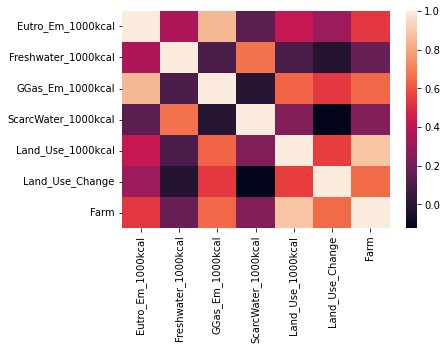

In [115]:
# Looking into the features that we will use for creation of a generalized index measurement formula

df_corr_wel = df[['Eutro_Em_1000kcal', 'Freshwater_1000kcal', 'GGas_Em_1000kcal', 'ScarcWater_1000kcal', 'Land_Use_1000kcal', 'Land_Use_Change', 'Farm']]

sns.heatmap(df_corr_wel.corr())

In [19]:
# or a lot more readable for looking at specific features:

df_corr_wel.corr().sort_values(by='Eutro_Em_1000kcal', ascending=False)

,Eutro_Em_1000kcal,Freshwater_1000kcal,GGas_Em_1000kcal,ScarcWater_1000kcal,Land_Use_1000kcal,Land_Use_Change,Farm
Eutro_Em_1000kcal,1.000000,0.356898,0.848483,0.146390,0.419761,0.312537,0.527915
GGas_Em_1000kcal,0.848483,0.096187,1.000000,-0.009407,0.631448,0.530758,0.642141
Farm,0.527915,0.176840,0.642141,0.250730,0.884551,0.651332,1.000000
Land_Use_1000kcal,0.419761,0.095508,0.631448,0.244947,1.000000,0.546193,0.884551
Freshwater_1000kcal,0.356898,1.000000,0.096187,0.669058,0.095508,-0.016080,0.176840
Land_Use_Change,0.312537,-0.016080,0.530758,-0.124298,0.546193,1.000000,0.651332
ScarcWater_1000kcal,0.146390,0.669058,-0.009407,1.000000,0.244947,-0.124298,0.250730


**Water-Land-Eutrophication (WEL) Index formula:** ((Freshwater Withdrawals per 1000kcals + Scarce Water Withdrawals per 1000kcals) * Eutrophication Emissions per 1000kcals) + Greenhouse Gas Emissions per 1000kcals / Land_Use_Change per 1000kcals + (Farm Emissions + Land-Use Change)/2

**Min-max normalization formula:** (xi-np.min(x)) / (np.max(x)-np.min(x))

In [117]:
# Creating a new column with the WEL index

df.insert(2, 'WEL_Index', (((df['Freshwater_1000kcal'] + df['ScarcWater_1000kcal']) * df['Eutro_Em_1000kcal']) + df['GGas_Em_1000kcal'] / (df['Land_Use_1000kcal'] + (df['Farm']+df['Land_Use_Change'])/2)))

In [118]:
# normalization on a 1-10 scale based on min-max values 

df['WEL_Index'] = (df['WEL_Index']-np.min(df['WEL_Index']))/(np.max(df['WEL_Index'])-np.min(df['WEL_Index']))*10

Now let us create a couple of useful tree maps. Usually, they are not used to display extensive statistical insight, but rather to convey information with ease even to non-specialized readers.

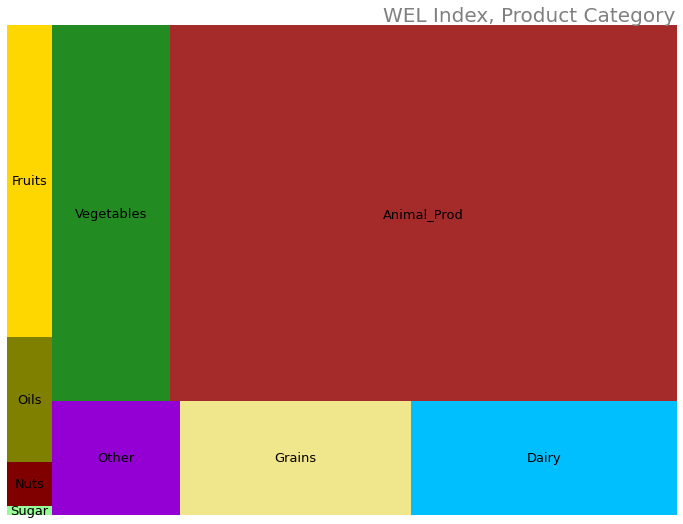

In [119]:
# Creating a general map tree with the WEL Index for food [Category]

df_wel = pd.DataFrame(df.groupby(['Category'])['WEL_Index'].sum()).sort_values(by='WEL_Index')

plt.rcParams['text.color'] = "black"
plt.rcParams['font.size'] = 13
colors = ['palegreen', 'maroon', 'olive', "gold", 'darkviolet', 'khaki', 'deepskyblue', 'forestgreen', 'brown']
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot()

sqf.plot(sizes = df_wel['WEL_Index'],
         label = df_wel.index,
         alpha=1, pad=False,
         color = colors,
         ax=ax)

plt.axis('off')

plt.text(78, 100,
         'WEL Index, Product Category',
         fontsize = 20, 
         color='grey', 
         horizontalalignment='center',
         verticalalignment='bottom')
        
plt.show()

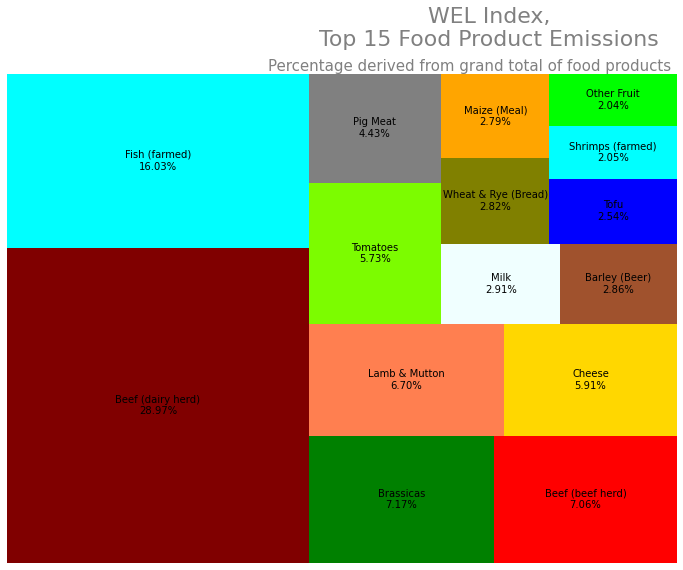

In [146]:
# Creating a map tree with percentages for the emissions of the Top 15 [Food_Products]

df_fpr = pd.DataFrame(df.groupby(['Food_Product'])['WEL_Index'].sum()).sort_values(by='WEL_Index', ascending=False).head(15)

# We will be adding percentage values in this tree map in order to increase its appeal to a wider audience
perc_vals = [f"{i/df_fpr['WEL_Index'].sum()*100:.2f}%" for i in df_fpr['WEL_Index']]
perc_vals = perc_vals[0:len(df_fpr)]

labels = [f"{i[0]}\n{i[1]}" for i in zip(df_fpr['WEL_Index'].index,perc_vals)]

plt.rcParams['text.color'] = "black"
plt.rcParams['font.size'] = 10
colors = ['maroon', 'cyan', 'green', 'red', 'coral', 'gold', 'lawngreen', 'gray', 'azure', 'sienna', 'olive', 'orange', 'blue', 'aqua', 'lime']
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot()

sqf.plot(sizes = df_fpr['WEL_Index'],
         label = labels,
         alpha=1, pad=False,
         color = colors,
        ax=ax)

plt.axis('off')

# We will add two titles with different fontsizes and different positioning in order to convey additional information.
# They need to be aligned precisely on the top right side of our tree map.
plt.text(72, 100,
         'WEL Index,\nTop 15 Food Product Emissions\n',
         fontsize = 22, 
         color ='grey', 
         horizontalalignment='center',
         verticalalignment='bottom')

plt.text(69, 100,
         '\nPercentage derived from grand total of food products',
         fontsize = 15, 
         color ='grey', 
         horizontalalignment='center',
         verticalalignment='bottom')
        
plt.show()

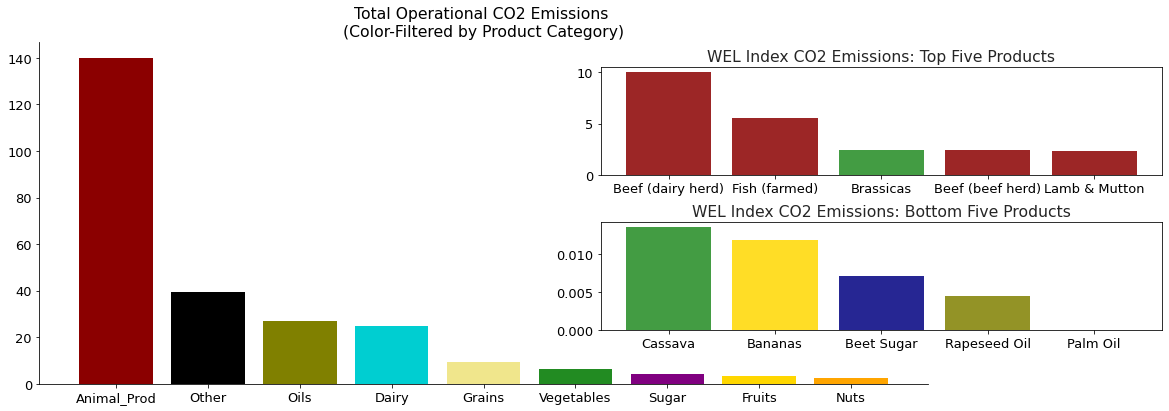

In [137]:
# Note: as mentioned earlier, Operational Emissions refers to CO2 emissions from the six features dealing with the Food Product lifecycle.
# These are: Land-Use Change, Farming, Processing, Packaging, Transportation, Retail

y1 = df.groupby(['Category'])['Total_Emissions'].sum().sort_values(ascending=False)
x1 = y1.index

y2 = df.groupby(['Food_Product'])['WEL_Index'].sum().sort_values(ascending=False).head(5)
x2 = y2.index

y3 = df.groupby(['Food_Product'])['WEL_Index'].sum().sort_values(ascending=False).tail(5)
x3 = y3.index

fig = plt.figure(figsize=(13,5))

ax1 = fig.add_axes([0.1,0.2,0.95,0.95])
ax2 = fig.add_axes([0.7,0.78,0.6,0.3])
ax3 = fig.add_axes([0.7,0.35,0.6,0.3])

# All food [Categories] are color-coded accordingly (e.g. all animal products are variations of red, vegetables variations of green, etc.)
colors1 = ['darkred', 'black','olive','darkturquoise','khaki','forestgreen','purple','gold','orange']
colors2 = ['darkred', 'darkred','forestgreen', 'darkred','darkred']
colors3 = ['forestgreen','gold','navy','olive','olive']

ax1.bar(x=x1, height=y1, color=colors1)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_title("Total Operational CO2 Emissions \n(Color-Filtered by Product Category)", alpha=1)
ax2.bar(x=x2, height=y2, alpha=0.85, color=colors2)
ax2.set_title("WEL Index CO2 Emissions: Top Five Products", alpha=0.85)
ax3.bar(x=x3, height=y3, alpha=0.85, color=colors3)
ax3.set_title("WEL Index CO2 Emissions: Bottom Five Products", alpha=0.85)
plt.show()

Finally, let us revisit the previous pie chart cluster visualization we generated earlier and re-create a grand overview, only this time we will be utilizing iteration.

In [127]:
data_emm = df.groupby(['Category'])['Total_Emissions'].sum().sort_values()
data_wel = df.groupby(["Category"])['WEL_Index'].sum().sort_values()

# adding the previously created sub-dfs to a new summary df
df_sum = pd.concat([data_farm, data_proce, data_transp, data_pack, data_transp, data_ret, data_emm, data_wel], axis=1)

df_sum_t = df_sum.T.round(2) # Transpose the grouped dataframe and round to 2 decimal points

In [307]:
# In the following section the part: ax = axes[row_number // 3, row_number % 3] is a crucial cog in the iteration and quite necessary to the position of each chart.
# If I may assist you, the reader, understand its function better consider the following simple loop:

for i in range(9):
    print(i//3,i%3)

# The output reveals the row,col position of each chart - hopefully this will ease the understanding of the following iteration.

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


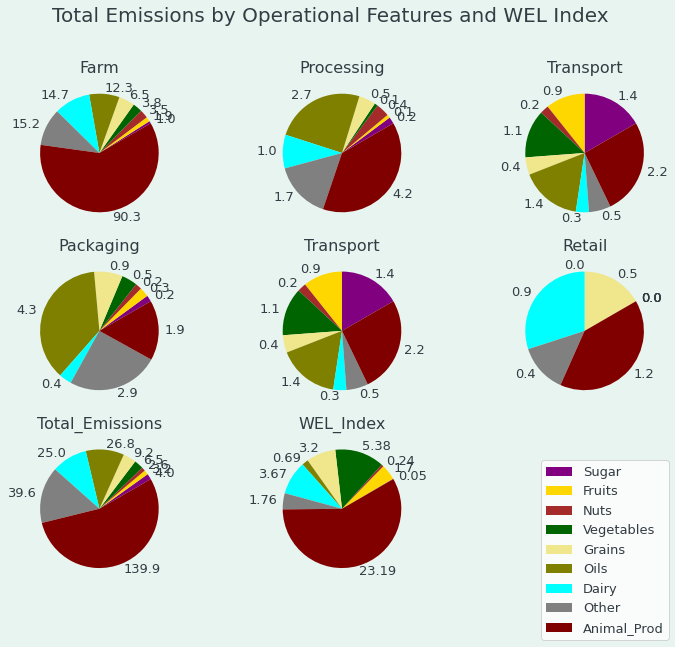

In [139]:
font_color = '#333c43'
color_vals = ["purple", "gold", "brown", "darkgreen", "khaki", "olive", "aqua", "grey", "maroon"]

fig, axes = plt.subplots(3, 3, figsize=(13, 10), facecolor='#e8f4f0')
fig.delaxes(ax = axes[2,2]) # delete the unneeded blank axes from the 3x3 plt.subplots

# iterating through the dataframe 
for row_number, (idx, row) in enumerate(df_sum_t.iterrows()):
    ax = axes[row_number // 3, row_number % 3]
    ax.pie(row, 
           labels=row.values, 
           startangle=30,
           colors=color_vals, 
           textprops={'color':font_color})
    ax.set_title(idx, fontsize=16, color=font_color)
    
    legend = plt.legend([x for x in row.index], 
                        bbox_to_anchor=(1.8, .87), # modifying position of legend
                        loc='upper left',  
                        ncol=1)
    for text in legend.get_texts():
        plt.setp(text, color=font_color) # changing legend color

fig.subplots_adjust(wspace=.01) # adjusting space between charts

title = fig.suptitle('Total Emissions by Operational Features and WEL Index', y=.95, fontsize=20, color=font_color)

plt.subplots_adjust(top=0.85, bottom=0.15)

Our analysis is complete. We addressed key issues like negative values and missing values, performed various imputation methods, compressed certain choosen features to generate a new overaching index variable, and performed various visualizations aimed at communicating different story-telling insights ranging from food product-specific, to top-tier and low-tier product emissions, easy-to-digest tree maps for quick communication to various stakeholders, as well as an extensive overview of operational emissions across the value chain.

I hope my description was useful to you, the reader, across various sections of the methodology and maybe you picked up a code section or two to mold and adapt to your own analyses!

All the best,
Dimitrios